In [2]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import matplotlib.pyplot as plt

from utils import *



In [33]:
spx = yf.Ticker("SPY").history(period="10y",interval = '1d')
spx  = pd.DataFrame(spx['Close'].dropna())
# btc=btc['2016':]


In [34]:
spx

,Close
Date,
2012-11-26,116.856277
2012-11-27,116.259796
2012-11-28,117.195976
2012-11-29,117.742760
2012-11-30,117.767632
...,...
2022-11-17,394.239990
2022-11-18,396.029999
2022-11-21,394.589996


In [74]:
def bolbands(df, l=19, mul = 1.58):

    data = df.copy()
    data['sma'] = data.rolling(window=l).mean()
    std = data['Close'].rolling(window=l).std()
    
    data['upper'] = data['sma'] + std * mul
    data['lower'] = data['sma'] - std * mul
    
    return data

data = bolbands(df=spx)


<AxesSubplot:xlabel='Date'>

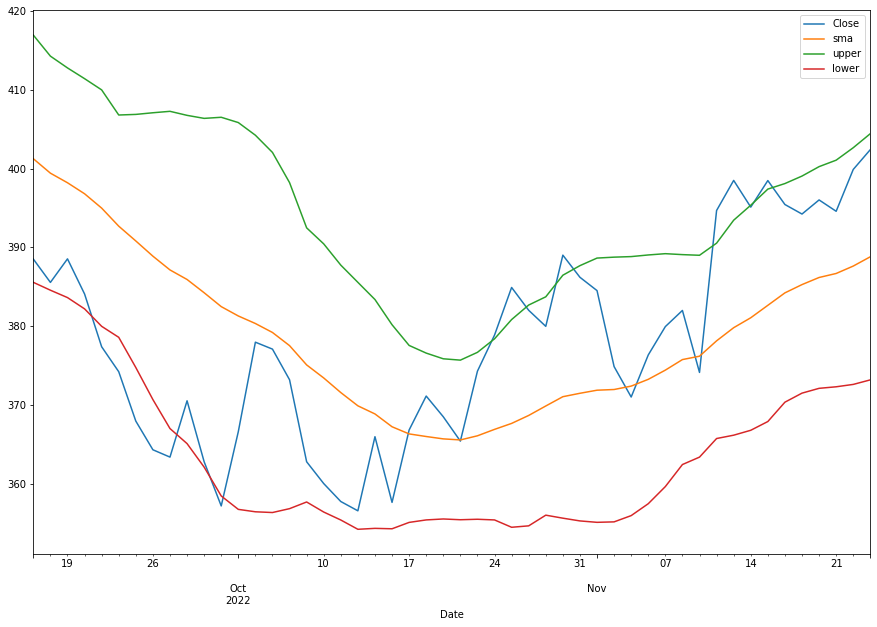

In [39]:
(data.tail(50)).plot(figsize=(15,10))

In [85]:
signals = []

for i in range(len(data)):
    if np.isclose(data['Close'].iloc[i],data['lower'].iloc[i],atol=5,rtol=0):
        
        signals.append(1)
        
    elif np.isclose(data['Close'].iloc[i],data['upper'].iloc[i],atol=5,rtol=0):
        
        signals.append(0)
        
    else:
        signals.append(0)

In [86]:
signals = pd.DataFrame(signals,index=data.index)
signals = signals[18:]

prices = data['Close'][signals.index[0]:]


In [87]:
returns = backtester(signals.values.ravel(),prices)
dd = max_dd(prices.pct_change().dropna().values.ravel())
wr = win_rate(signals, returns)

<AxesSubplot:xlabel='Date'>

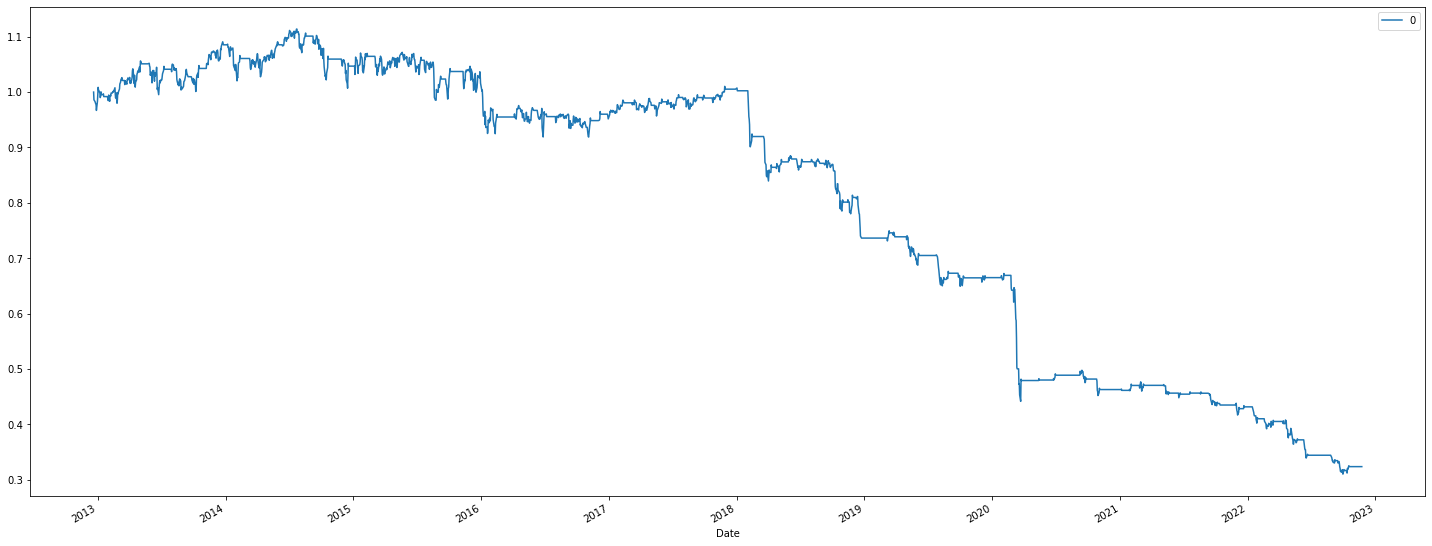

In [88]:
returns.plot(figsize=(25,10))

In [89]:
dd

-0.3371725722970126

In [90]:
wr

0.18855084067253802

In [100]:
display('Strat',(returns.iloc[-1]-1)[0])
display('SPX',(spx/spx.iloc[0]).iloc[-1]-1)

'Strat'

-0.6762206763162207

'SPX'

Close    2.443718
Name: 2022-11-23 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

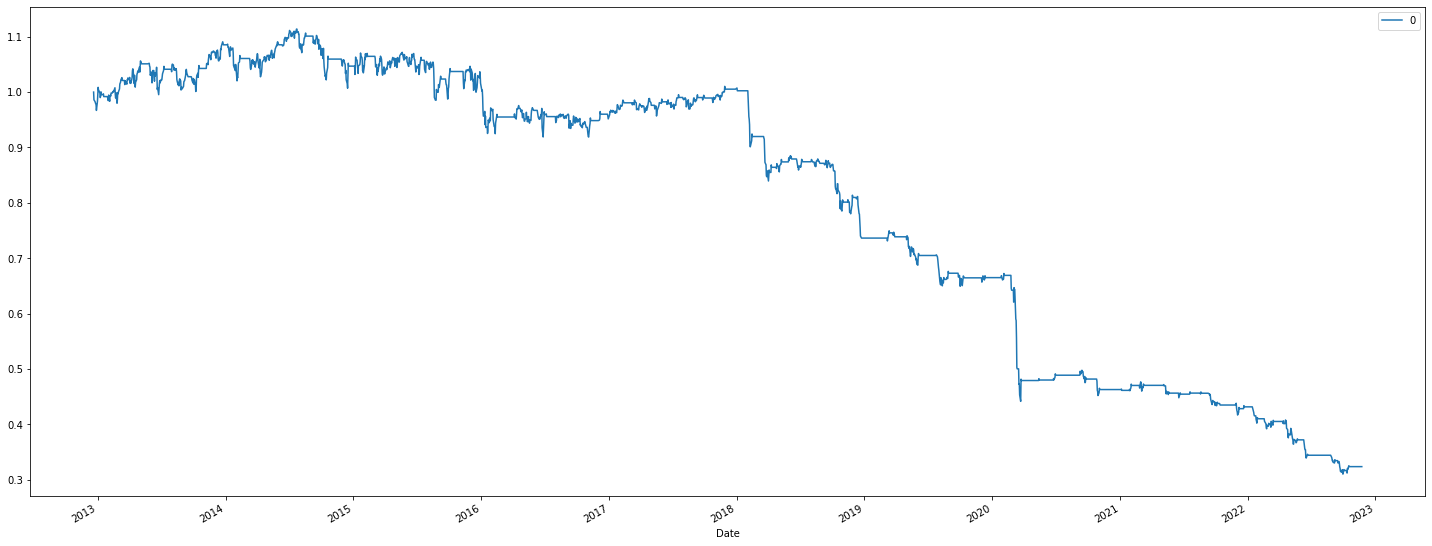

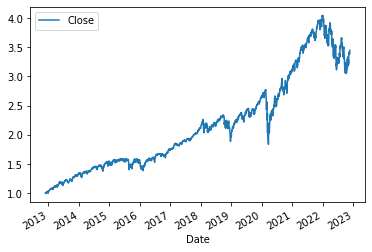

In [101]:
returns.plot(figsize=(25,10))
(spx/spx.iloc[0]).plot()